Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)

In [1]:
import numpy as np 
import matplotlib as plt 
import pandas as pd
import seaborn as sns
import re
import os.path

In [2]:
# define volume for parm file
V = 0

parm = open('parms.inp', 'r')

for line in parm:
    
    if 'WaterBox' in line:
        linesplit = line.split(' ')
        #print(linesplit)
        dim = re.split(',',linesplit[-3])
        print(type(dim))

        dim1 = dim[0][0]
        
        V = int(dim[0][1:])*int(dim[1])*int(dim[2][:-1]) * 1e-9


V 



<class 'list'>


0.054184032

In [2]:
file = open('copy_numbers_time.dat', 'r')

count = 0
for line in file:
    linesplit = line.split(',')
    if count == 0:
        copynumbers = {k:0 for k in linesplit}
    break 





In [3]:
df = pd.read_csv('copy_numbers_time.dat')

df

,Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)
0,0.00000,2129,0,326,326,120,120,238,238,0,0,0,0,0
1,0.00005,2128,0,326,326,120,119,238,238,0,1,0,0,0
2,0.00010,2127,0,326,326,120,118,238,238,0,2,0,0,0
3,0.00015,2127,0,326,326,120,118,238,238,0,2,0,0,0
4,0.00020,2126,0,326,326,120,117,238,238,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,9.99980,6,1577,22,64,96,116,0,0,304,4,24,238,238
199997,9.99985,6,1576,21,64,96,116,0,0,305,4,24,238,238
199998,9.99990,7,1576,21,65,97,117,0,0,305,3,23,238,238
199999,9.99995,7,1576,21,65,97,117,0,0,305,3,23,238,238


<AxesSubplot:xlabel='Time (s)'>

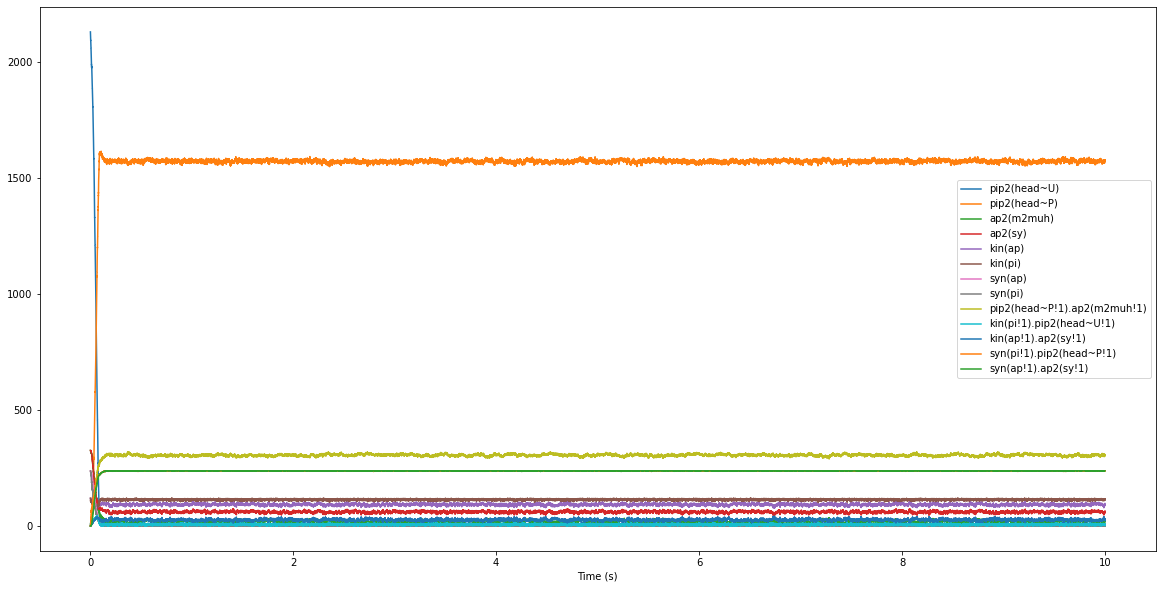

In [4]:
df.plot.line(x='Time (s)', figsize=(20,10))

In [5]:
def concentration(copies, V):

    moles = copies/6.023e17 #converts copies to micromoles
    V = V/1e15 #convert volume in um^-3 to liters
    conc = moles/V #divide micromoles by volume
    
    return conc


In [6]:
def df_pretty(df, V):
    newdf = pd.DataFrame()
    newdf['Time (us)'] = df['Time (s)'].apply(lambda x: x*1e6)
    newdf['PIP'] = df.iloc[:,1].apply(lambda copies: concentration(copies, V))
    newdf['PIP2'] = df.iloc[:,2].apply(lambda copies: concentration(copies, V))
    ##newdf['A'] = df.iloc[:,3].apply(lambda copies: concentration(copies, V))
    #newdf['A'] = (df['ap2(m2muh)'][0] - df.iloc[:,9] - df.iloc[:,11] - df.iloc[:,13])
    newdf['K'] = df[['kin(ap)','kin(pi)']].min(axis=1)
    newdf['K'] = newdf['K'].apply(lambda copies: concentration(copies, V))
    newdf['P'] = df[['syn(ap)','syn(pi)']].min(axis=1)
    newdf['P'] = newdf['P'].apply(lambda copies: concentration(copies, V))
    newdf['LK'] = df['kin(pi!1).pip2(head~U!1)'] - df['kin(ap!1).ap2(sy!1)']
    newdf['LK'] = newdf['LK'].apply(lambda copies: concentration(copies, V))
    newdf['LpP'] = df['syn(pi!1).pip2(head~P!1)'] - df['syn(ap!1).ap2(sy!1)']
    newdf['LpP'] = newdf['LpP'].apply(lambda copies: concentration(copies, V))
    newdf['A'] = df[['ap2(m2muh)','ap2(sy)']].min(axis=1)
    newdf['A'] = newdf['A'].apply(lambda copies: concentration(copies, V))

    ## difference between LpA and AK or AP because enzyme can only bind LpA
    newdf['LpA'] = df['pip2(head~P!1).ap2(m2muh!1)'] - df['kin(ap!1).ap2(sy!1)'] - df['syn(ap!1).ap2(sy!1)']
    newdf['LpA'] = newdf['LpA'].apply(lambda copies: concentration(copies, V))

    newdf['LpAK'] = df['kin(ap!1).ap2(sy!1)']
    newdf['LpAK'] = newdf['LpAK'].apply(lambda copies: concentration(copies, V))

    newdf['LpAP'] = df['syn(ap!1).ap2(sy!1)']
    newdf['LpAP'] = newdf['LpAP'].apply(lambda copies: concentration(copies, V))

    #newdf['LpAPLp'] = df['syn(ap!1).ap2(sy!1)']
    #newdf['LpAPLp'] = newdf['LpAPLp'].apply(lambda copies: concentration(copies, V))
    

    return newdf 


In [7]:
newdf = df_pretty(df, V)

In [8]:
newdf

,Time (us),PIP,PIP2,K,P,LK,LpP,A,LpA,LpAK,LpAP
0,0.0,87.182899,0.000000,7.094112,5.434670,0.000000,0.000000,9.977391,0.000000,0.000000,0.000000
1,500.0,87.182899,0.000000,7.094112,5.434670,0.000000,0.000000,9.977391,0.000000,0.000000,0.000000
2,1000.0,87.162156,0.020743,7.094112,5.434670,0.000000,0.000000,9.977391,0.000000,0.000000,0.000000
3,1500.0,87.162156,0.020743,7.094112,5.434670,0.000000,0.000000,9.977391,0.000000,0.000000,0.000000
4,2000.0,87.162156,0.020743,7.094112,5.434670,0.000000,0.000000,9.977391,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
199996,99998000.0,75.359380,3.401855,6.119190,1.078637,-0.124458,-1.182352,4.646436,-0.933436,0.974922,4.356034
199997,99998500.0,75.421609,3.339626,6.181419,1.078637,-0.124458,-1.244581,4.708665,-0.746749,0.912693,4.356034
199998,99999000.0,75.359380,3.215168,6.139933,1.057894,-0.062229,-1.244581,4.646436,-0.746749,0.954179,4.376777
199999,99999500.0,75.359380,3.381112,6.098447,1.057894,-0.145201,-1.286067,4.604950,-0.871207,0.995665,4.376777


In [52]:
os.path.dirname(__file__)

NameError: name '__file__' is not defined

Text(0, 0.5, 'Concentration (uM)')

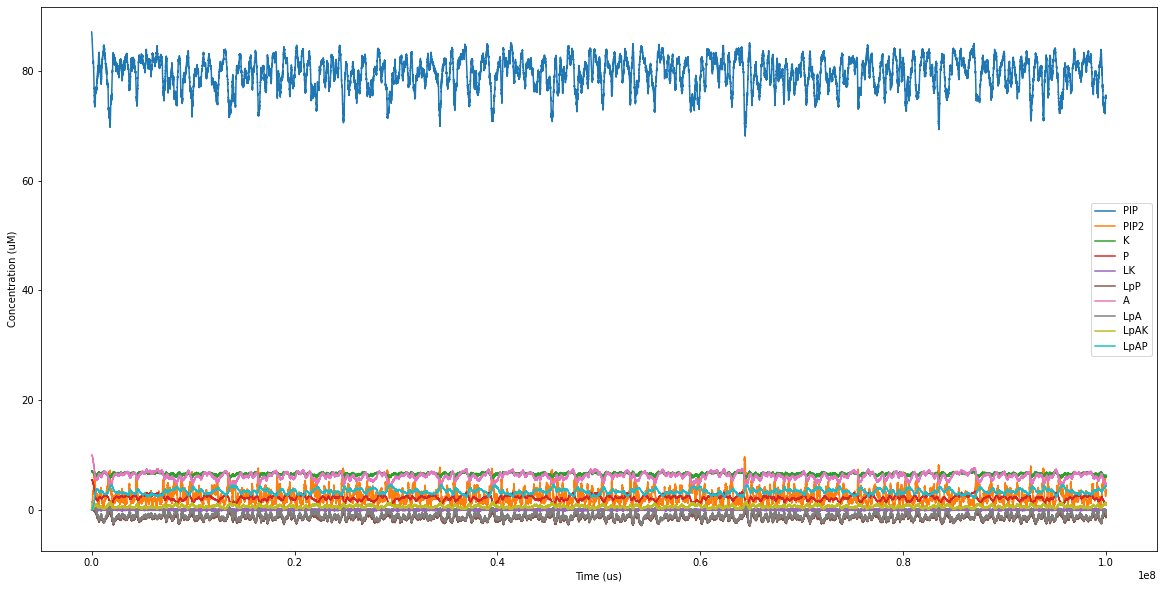

In [9]:
ax = newdf.plot.line(x = 'Time (us)', figsize=(20,10))
ax.set_ylabel('Concentration (uM)')
